## Can Gözpınar 68965
### Homework

In [180]:
import numpy as np
import pandas as pd

### Read the data files

In [181]:
#read in data from csv files
dataSetImages = np.genfromtxt("hw03_data_set_images.csv", delimiter = ",") #data 
dataSetLabels = np.genfromtxt("hw03_data_set_labels.csv", dtype = 'str') #labels
#get rid of "" around class names
dataSetLabels = np.char.strip(dataSetLabels, '"').astype(str)
dataSet = np.hstack((dataSetImages, dataSetLabels[:, None])) #321th column is label of the xi

### Divide the data

In [182]:
#first 25 of each class to training set
trainingDataSet = np.vstack((dataSet[dataSet[:,-1] == 'A'][0:25], dataSet[dataSet[:,-1] == 'B'][0:25], dataSet[dataSet[:,-1] == 'C'][0:25], dataSet[dataSet[:,-1] == 'D'][0:25], dataSet[dataSet[:,-1] == 'E'][0:25]))

#last 14 of each class to test set
testDataSet = np.vstack((dataSet[dataSet[:,-1] == 'A'][25:], dataSet[dataSet[:,-1] == 'B'][25:], dataSet[dataSet[:,-1] == 'C'][25:], dataSet[dataSet[:,-1] == 'D'][25:], dataSet[dataSet[:,-1] == 'E'][25:]))

### Estimate parameters

In [183]:
#estimate parameteres
pcd1 = np.sum(trainingDataSet[trainingDataSet[:,-1] == 'A'][:,:-1].astype(float), axis = 0) * (1 / trainingDataSet[trainingDataSet[:,-1] == 'A'].shape[0])

pcd2 = np.sum(trainingDataSet[trainingDataSet[:,-1] == 'B'][:,:-1].astype(float), axis = 0) * (1 / trainingDataSet[trainingDataSet[:,-1] == 'B'].shape[0])

pcd3 = np.sum(trainingDataSet[trainingDataSet[:,-1] == 'C'][:,:-1].astype(float), axis = 0) * (1 / trainingDataSet[trainingDataSet[:,-1] == 'C'].shape[0])

pcd4 = np.sum(trainingDataSet[trainingDataSet[:,-1] == 'D'][:,:-1].astype(float), axis = 0) * (1 / trainingDataSet[trainingDataSet[:,-1] == 'D'].shape[0])

pcd5 = np.sum(trainingDataSet[trainingDataSet[:,-1] == 'E'][:,:-1].astype(float), axis = 0) * (1 / trainingDataSet[trainingDataSet[:,-1] == 'E'].shape[0])

#estimate prior probabilities
prior1 = trainingDataSet[trainingDataSet[:,-1] == 'A'].shape[0] / trainingDataSet.shape[0]
prior2 = trainingDataSet[trainingDataSet[:,-1] == 'A'].shape[0] / trainingDataSet.shape[0]
prior3 = trainingDataSet[trainingDataSet[:,-1] == 'A'].shape[0] / trainingDataSet.shape[0]
prior4 = trainingDataSet[trainingDataSet[:,-1] == 'A'].shape[0] / trainingDataSet.shape[0]
prior5 = trainingDataSet[trainingDataSet[:,-1] == 'A'].shape[0] / trainingDataSet.shape[0]

In [184]:
#uncomment to print the estimate parameters
#print(pcd1)
#print(pcd2)
#print(pcd3)
#print(pcd4)
#print(pcd5)

### Draw parameter estimations as Images

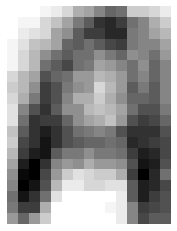

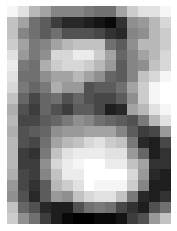

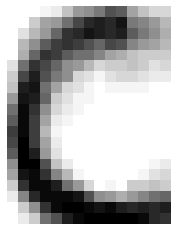

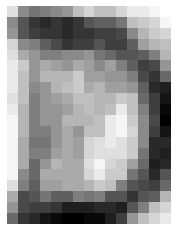

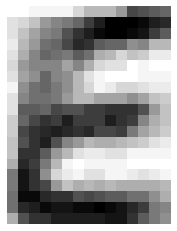

In [185]:
import matplotlib.pyplot as plt

#draw the estimation for letter 'A'
plt.figure(1)
drawA = np.transpose(np.vstack((pcd1[:20],pcd1[20:40],pcd1[40:60],pcd1[60:80],pcd1[80:100],pcd1[100:120],pcd1[120:140],pcd1[140:160],pcd1[160:180],pcd1[180:200],pcd1[200:220],pcd1[240:260],pcd1[260:280],pcd1[280:300],pcd1[300:320])))
plt.axis('off') #hides the axis on the output image
plt.imshow(drawA, cmap='binary')

#draw the estimation for letter 'B'
plt.figure(2)
drawB = np.transpose(np.vstack((pcd2[:20],pcd2[20:40],pcd2[40:60],pcd2[60:80],pcd2[80:100],pcd2[100:120],pcd2[120:140],pcd2[140:160],pcd2[160:180],pcd2[180:200],pcd2[200:220],pcd2[240:260],pcd2[260:280],pcd2[280:300],pcd2[300:320])))
plt.axis('off') #hides the axis on the output image
plt.imshow(drawB, cmap='binary')

#draw the estimation for letter 'C'
plt.figure(3)
drawC = np.transpose(np.vstack((pcd3[:20],pcd3[20:40],pcd3[40:60],pcd3[60:80],pcd3[80:100],pcd3[100:120],pcd3[120:140],pcd3[140:160],pcd3[160:180],pcd3[180:200],pcd3[200:220],pcd3[240:260],pcd3[260:280],pcd3[280:300],pcd3[300:320])))
plt.axis('off') #hides the axis on the output image
plt.imshow(drawC, cmap='binary')

#draw the estimation for letter 'D'
plt.figure(4)
drawD = np.transpose(np.vstack((pcd4[:20],pcd4[20:40],pcd4[40:60],pcd4[60:80],pcd4[80:100],pcd4[100:120],pcd4[120:140],pcd4[140:160],pcd4[160:180],pcd4[180:200],pcd4[200:220],pcd4[240:260],pcd4[260:280],pcd4[280:300],pcd4[300:320])))
plt.axis('off') #hides the axis on the output image
plt.imshow(drawD, cmap='binary')

#draw the estimation for letter 'E'
plt.figure(5)
drawE = np.transpose(np.vstack((pcd5[:20],pcd5[20:40],pcd5[40:60],pcd5[60:80],pcd5[80:100],pcd5[100:120],pcd5[120:140],pcd5[140:160],pcd5[160:180],pcd5[180:200],pcd5[200:220],pcd5[240:260],pcd5[260:280],pcd5[280:300],pcd5[300:320])))
plt.axis('off') #hides the axis on the output image
plt.imshow(drawE, cmap='binary')

### making the predictions 

In [186]:
def safelog(x): # to prevent flow
    return(np.log(x + 1e-100))#to prevent log0

In [187]:
#discriminant function
def discriminant(x, pcd, prior): # returns the discriminant value
    term1 = np.matmul(1.0- x.astype(float), safelog(1.0- pcd)) + safelog(0.2)
    term2 = np.matmul(x.astype(float), safelog(pcd)) + np.matmul(1.0- x.astype(float), safelog(1.0- pcd))
    term3 = safelog(0.2)
    return  term1 + term2 + term3
    
    

In [188]:
#discriminant function
#def discriminant(x, pcd, prior): # returns the discriminant value
#    x = x.astype(float)
#    ones = np.ones(320)
#    term1 = x * safelog(pcd)# (320,)
#    term2 = ones - x * safelog(ones - pcd) # (320,)
#    termsSum = term1 + term2
    
#    return np.sum(termsSum) + prior

### Confusion Matrix for the training data set

In [189]:
# one-of-K encoding truth values
y_truth = trainingDataSet[:,-1]
Y_truth = np.zeros((len(y_truth), 5)).astype(int)
for i in range(y_truth.shape[0]):
    if(y_truth[i] == '1'):
        Y_truth[i, 0] = 1
    if(y_truth[i] == '2'):
        Y_truth[i, 1] = 1
    if(y_truth[i] == '3'):
        Y_truth[i, 2] = 1
    if(y_truth[i] == '4'):
        Y_truth[i, 3] = 1
    if(y_truth[i] == '5'):
        Y_truth[i, 4] = 1

In [190]:
#predict for training data set
Y_predicted = np.array([[1, 2, 3, 4, 5]])# to initialize so that np.append doesnt raise an error
for row in trainingDataSet[:,:-1]:
    #calculate the discriminant values for each class
    discriminant1 = discriminant(row, pcd1, prior1)
    discriminant2 = discriminant(row, pcd2, prior2)
    discriminant3 = discriminant(row, pcd3, prior3)
    discriminant4 = discriminant(row, pcd4, prior4)
    discriminant5 = discriminant(row, pcd5, prior5)
    #return discriminant values as array to calculate one of k encoding later on
    Y_predicted = np.append(Y_predicted, [[discriminant1, discriminant2, discriminant3, discriminant4, discriminant5]], axis = 0)
Y_predicted = Y_predicted[1:,:]#get rid of the initialized first row  #(125,5)


In [191]:
#calculate the confusion matrix for the training data set
y_predicted = np.argmax(Y_predicted, axis = 1) + 1
confusion_matrix = pd.crosstab(y_predicted, y_truth, rownames = ['y_pred'], colnames = ['y_truth'])
print(confusion_matrix)

y_truth   A   B   C   D   E
y_pred                     
1        25   0   0   0   0
2         0  24   1   0   1
3         0   0  24   0   0
4         0   1   0  25   0
5         0   0   0   0  24


### Confusion Matrix for the test Data set

In [192]:
# one-of-K encoding truth values
y_truth = testDataSet[:,-1]
Y_truth = np.zeros((len(y_truth), 5)).astype(int)
for i in range(y_truth.shape[0]):
    if(y_truth[i] == '1'):
        Y_truth[i, 0] = 1
    if(y_truth[i] == '2'):
        Y_truth[i, 1] = 1
    if(y_truth[i] == '3'):
        Y_truth[i, 2] = 1
    if(y_truth[i] == '4'):
        Y_truth[i, 3] = 1
    if(y_truth[i] == '5'):
        Y_truth[i, 4] = 1

In [193]:
#predict for training data set
Y_predicted = np.array([[1, 2, 3, 4, 5]])# to initialize so that np.append doesnt raise an error
for row in testDataSet[:,:-1]:
    #calculate the discriminant values for each class
    discriminant1 = discriminant(row, pcd1, prior1)
    discriminant2 = discriminant(row, pcd2, prior2)
    discriminant3 = discriminant(row, pcd3, prior3)
    discriminant4 = discriminant(row, pcd4, prior4)
    discriminant5 = discriminant(row, pcd5, prior5)
    #return discriminant values as array to calculate one of k encoding later on
    Y_predicted = np.append(Y_predicted, [[discriminant1, discriminant2, discriminant3, discriminant4, discriminant5]], axis = 0)
Y_predicted = Y_predicted[1:,:]#get rid of the initialized first row  #(125,5)


In [194]:
#calculate the confusion matrix for the test data set
y_predicted = np.argmax(Y_predicted, axis = 1) + 1
confusion_matrix = pd.crosstab(y_predicted, y_truth, rownames = ['y_pred'], colnames = ['y_truth'])
print(confusion_matrix)

y_truth  A   B  C   D   E
y_pred                   
1        7   0  0   0   0
2        0  11  3   2   4
3        0   0  7   0   0
4        7   3  3  12   0
5        0   0  1   0  10
